# Exercise: Exploratory Data Analysis with Pandas
## Instructions
1. Data Collection
    - Search and collect data on the following: (1993 - 2023)
        - Israel interest tares
        - US interest rates
        - USD to ILS exchange rates
    - For each dataset, create a pandas DataFrame with the following columns:
        - Year
        - Month
        - Current_Rate (Interest rate or exchange rate for that month)
        - Change_From_Last_Month (Difference in Current_Rate from the previous month)
        - Optional: You may include additional columns if you find them useful (e.g., Change_Percentage, Date).



In [176]:
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
#טעינת קובץ ריביות של ישראל
interest_israel = pd.read_csv('data.csv')
interest_israel.head()

,Time period,interest
0,1994-01,11.78
1,1994-02,11.87
2,1994-03,11.87
3,1994-04,11.87
4,1994-05,12.24


In [156]:
#המרה של התאריך לאובייקט של pandas
interest_israel['Time period'] = pd.to_datetime(interest_israel['Time period'])

In [157]:
#טעינת קובץ רביות של ארהב
interest_usa = pd.read_csv('FEDFUNDS.csv')

In [158]:
#המרה לאובייקט תאריך של פנדס
interest_usa['DATE'] = pd.to_datetime(interest_usa['DATE'])

In [159]:
#טעינת קבוץ של שער הדולר והמרת התאריך לאובייקט מתאים
usd_ils = pd.read_csv('USD_ILS Historical Data.csv')
usd_ils['Date'] = pd.to_datetime(usd_ils['Date'])


In [160]:
#יצירת טבלה חדשה של ריבית בישראל עם הערכים הנדרשים
df_isr = pd.DataFrame()
df_isr['Years'] = interest_israel['Time period'].dt.year
df_isr['Months'] = interest_israel['Time period'].dt.month
df_isr['Current_Rate'] = interest_israel['interest']
df_isr['Change_From_Last_Month'] = df_isr['Current_Rate'].diff()

In [161]:
#יצירת טבלה חדשה של רביות בארהב עם ערכים חדשים
df_usa = pd.DataFrame()
df_usa['Years'] = interest_usa['DATE'].dt.year
df_usa['Months'] = interest_usa['DATE'].dt.month
df_usa['Current_Rate'] = interest_usa['FEDFUNDS']
df_usa['Change_From_Last_Month'] = df_usa['Current_Rate'].diff()

In [162]:
#יצירת טבלה של שער חליפין עם ערכים מותאמים אישית
df_usd_ils = pd.DataFrame()
df_usd_ils['Years'] = usd_ils['Date'].dt.year
df_usd_ils['Months'] = usd_ils['Date'].dt.month
df_usd_ils['exchange_rate'] = usd_ils['Price']
df_usd_ils['Change_From_Last_Month'] = df_usd_ils['exchange_rate'].diff()


## Part A: Single DataFrame Analysis 
1. Display the first 5 rows of the US interest rates DataFrame.

2. Calculate the average Israeli interest rate over the period covered by your data.

3. Find the month and year when the USD to ILS exchange rate had the highest increase from the previous month.

4. Determine the total number of months where the US interest rate decreased compared to the previous month.

5. Add a new column to the Israeli interest rates DataFrame called Change_Percentage, representing the percentage change from the previous month.



In [163]:
# A - 1
# your code here
df_usa.head()

,Years,Months,Current_Rate,Change_From_Last_Month
0,1993,1,3.02,NaN
1,1993,2,3.03,0.01
2,1993,3,3.07,0.04
3,1993,4,2.96,-0.11
4,1993,5,3.00,0.04


In [164]:
# A - 2
# your code here

average_isr_rate = df_isr['Current_Rate'].mean()
average_isr_rate



np.float64(6.396355555555556)

In [165]:
# A - 3
# your code here

usd_ils_diff = df_usd_ils['Change_From_Last_Month'].idxmax()

df_usd_ils.loc[usd_ils_diff]


Years                     2009.0000
Months                       4.0000
exchange_rate                4.1730
Change_From_Last_Month       0.2692
Name: 165, dtype: float64

In [166]:
# A - 4
# your code here
df_isr_change = df_isr['Change_From_Last_Month'] < 0
df_isr_change.sum()

np.int64(119)

In [167]:
# A - 5
# your code here
df_isr['Change_Percentage'] = df_isr['Change_From_Last_Month'] / df_isr['Current_Rate'] * 100
df_isr.head()

,Years,Months,Current_Rate,Change_From_Last_Month,Change_Percentage
0,1994,1,11.78,NaN,NaN
1,1994,2,11.87,0.09,0.758214
2,1994,3,11.87,0.00,0.000000
3,1994,4,11.87,0.00,0.000000
4,1994,5,12.24,0.37,3.022876


## Part B: Merging DataFrames
1. Merge the US and Israeli interest rates DataFrames on Year and Month.

2. In the merged DataFrame, create a new column Rate_Difference that shows the difference between the Israeli and US interest rates for each month.

3. Identify all months when the Israeli interest rate was at least 1% higher than the US interest rate - IH (Israeli Higher).
Identify all months when the US interest rate was at least 1% higher than the Israeli interest rate - UH (US Higher).
Identify all months when the interest rates were within 1% of each other - N (Near)
make a new column called Rate_Comparison with the following values: IH, UH, or N.

4. Merge the exchange rate DataFrame with the merged interest rates DataFrame.

5. After merging all three DataFrames, find the correlation between the Rate_Difference and the Current_Rate of the exchange rate.
hint: find the connection between the difference in interest rates and the exchange rates, use any method you think is appropriate.
provide an explanation of the results (in Hebrew) - at least 2 rows of text + a proof of the connection(some output) you found.


In [168]:
# B - 1
# your code here
interest_df = pd.merge(left=df_isr, right=df_usa, left_on=('Years','Months'), right_on=('Years','Months'))

In [169]:
# B - 2
# your code here
interest_df['Rate_Difference'] = interest_df['Current_Rate_x'] - interest_df['Current_Rate_y']

In [170]:
# B - 3
# your code here
interest_df['Rate_Comparison'] = interest_df.apply(lambda row: 'UH' if row.Rate_Difference  > 1 else ('IH' if row.Rate_Difference < -1 else 'N'), axis=1)
interest_df_UH = interest_df[interest_df['Rate_Comparison'] == 'IH']
interest_df_UH.tail()

,Years,Months,Current_Rate_x,Change_From_Last_Month_x,Change_Percentage,Current_Rate_y,Change_From_Last_Month_y,Rate_Difference,Rate_Comparison


In [180]:
# B - 4
# your code here
exchange_df = pd.merge(left=interest_df, right=df_usd_ils, left_on=('Years','Months'), right_on=('Years','Months'))
exchange_df.tail(20)

,Years,Months,Current_Rate_x,Change_From_Last_Month_x,Change_Percentage,Current_Rate_y,Change_From_Last_Month_y,Rate_Difference,Rate_Comparison,exchange_rate,Change_From_Last_Month
329,2021,6,1.600,0.000,0.000000,0.08,0.02,1.520,UH,3.2570,0.0322
330,2021,7,1.600,0.000,0.000000,0.10,0.02,1.500,UH,3.2248,0.0216
331,2021,8,1.600,0.000,0.000000,0.09,-0.01,1.510,UH,3.2032,-0.0203
332,2021,9,1.600,0.000,0.000000,0.08,-0.01,1.520,UH,3.2235,0.0645
333,2021,10,1.600,0.000,0.000000,0.08,0.00,1.520,UH,3.1590,0.0099
334,2021,11,1.600,0.000,0.000000,0.08,0.00,1.520,UH,3.1491,0.0444
335,2021,12,1.600,0.000,0.000000,0.08,0.00,1.520,UH,3.1047,-0.0624
336,2022,1,1.600,0.000,0.000000,0.08,0.00,1.520,UH,3.1671,-0.0377
337,2022,2,1.600,0.000,0.000000,0.08,0.00,1.520,UH,3.2048,0.0148
338,2022,3,1.600,0.000,0.000000,0.20,0.12,1.400,UH,3.1900,-0.1512


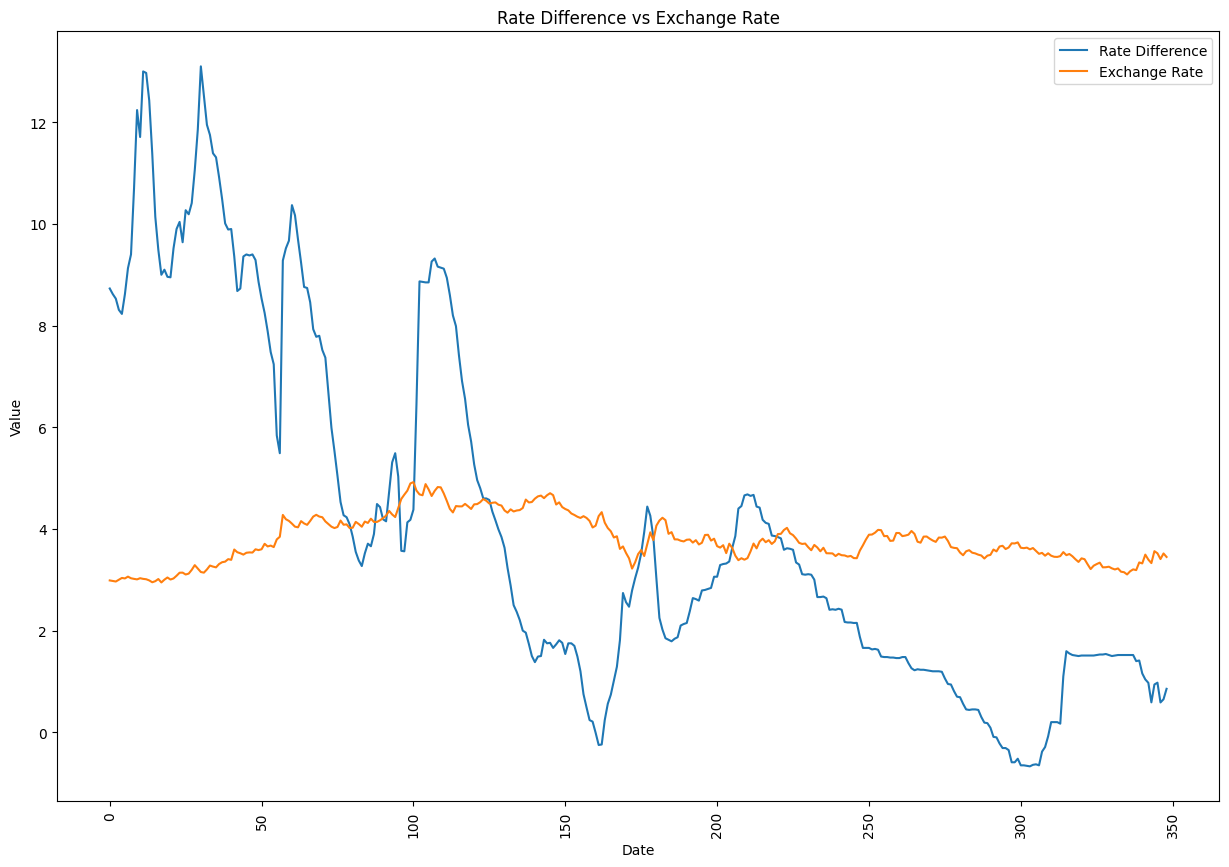

In [198]:
# B - 5
# your code here
plt.figure(figsize=(15, 10))
plt.plot(exchange_df.index, exchange_df['Rate_Difference'], label='Rate Difference')
plt.plot(exchange_df.index, exchange_df['exchange_rate'], label='Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Rate Difference vs Exchange Rate')
plt.xticks(rotation=90)
plt.legend()
plt.show()



## Part C: Analyzing Relationships Between DataFrames
1. Analyze whether increases in US interest rates are associated with increases or decreases in the USD to ILS exchange rate in the same month.

2. Determine if changes in the Israeli interest rate have a stronger impact on the exchange rate than changes in the US interest rate.

3. Find any time lags in the effect of interest rate changes on the exchange rate. For example, does a change in US interest rates affect the exchange rate in the following month?
(כלומר- האם כשיש שינוי בריבית כלשהי - האם מייד יש שינוי בשער ההמרה? או שיש דיליי של חודש/חודשים עד שמרגישים את ההשפעה - אם בכלל?)

4. Calculate the rolling past 3-month average of the exchange rate for each data time, and add it as a new column.

5. Identify any periods where both US and Israeli interest rates were decreasing, and analyze how the exchange rate behaved during those periods.



In [173]:
# Bonus 

# Bonus
choose 3 global / local events or periods that you think could have affected the exchange rate or interest rates
and analyze the effect of these events on the data you collected.
show proof of your analysis that supports your claim.

(כלומר- תבחנו אירועים שקרו בתקופה שאתם עובדים עליה ובדקו איך הם השפיעו על הנתונים שאתם עובדים איתם)
למשל: בחירות בארה״ב, בחירות בישראל, רוסיה אוקראינה, מלחמות בישראל וכו׳.

In [174]:
# Your code here